## RELATÓRIO DE PROJETO: DISCIPLINAS DE PREPARAÇÃO E ANÁLISE DE DADOS E PROCESSAMENTO DE DADOS

### Jessica Ilkiw Lopes
### Marcelo Silva da Silva

In [1]:
#scikit-learn: não possui técnicas específicas para desbalanceamento
# imblearn (imbalanced-learn)
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

1) Descrição da Base de Dados:

* Indicar o nome da base;
        R: Dados de câncer de mama (Breast Cancer)



* Que tipo de dado (ou problema) caracteriza esta base de dados, ou seja, o que se pretende extrair de conhecimento a partir dos dados lá disponíveis
(classificação/regressão, agrupamento, associação, por exemplo); 
        R: Algoritmo para prever a recorrência do câncer de mama, do tipo classificação

* Indicar quem forneceu esta base, além da data da coleta dos dados (início e
final), além de particularidades (por exemplo, a coleta foi interrompida durante
um período de tempo e depois retomada); 
        R: Conjunto de Dados do Câncer de Mama com 286 ocorrências de dados
           reais de pacientes obtidos do Instituto de Oncologia de Ljubljana, 
           não se tem a informação sobre o período de coleta e como foi feita.

* Quantos atributos (variáveis) possui e para cada um o tipo de atributo: nominal, real, discreto, além dos valores (ou faixa de valores); 
      R: 286 instâncias, 9 atributos, 10 contando com o class.



* Indicar se existem informações já publicadas sobre seu uso e, em caso positivo, onde foi publicado, por quem, o quê; 

      R: 
      Publicações Relevantes:

      Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). 
      The Multi-Purpose Incremental Learning System AQ15 and its Testing 
      Application to Three Medical Domains. In Proceedings of the Fifth 
      National Conference on Artificial Intelligence, 1041-1045, Philadelphia, 
      PA: Morgan Kaufmann.

      Clark,P. & Niblett,T. (1987). Induction in Noisy Domains. In Progress in
       Machine Learning (from the Proceedings of the 2nd European Working 
       Session on Learning), 11-30, Bled, Yugoslavia: Sigma Press.

      Tan, M., & Eshelman, L. (1988). Using weighted networks to represent 
      classification knowledge in noisy domains. Proceedings of the Fifth 
      International Conference on Machine Learning, 121-134, Ann Arbor, MI.

      Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A 
      Knowledge-Elicitation Tool for Sophisticated Users. In I.Bratko & N.
      Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.



* Quantos exemplos existem para cada classe, no caso de classificação, ou a faixa de valores da variável a ser prevista no caso de regressão.

R:
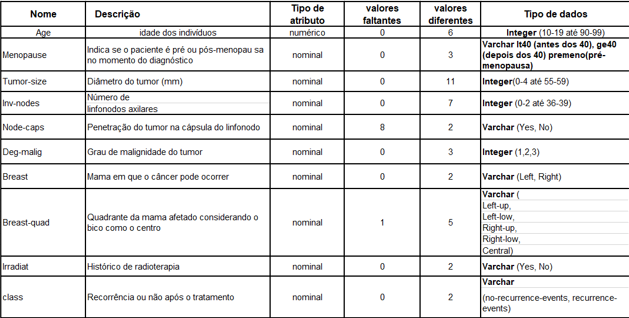

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data')

In [4]:
df.head(5)

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [5]:
df.dtypes

no-recurrence-events    object
30-39                   object
premeno                 object
30-34                   object
0-2                     object
no                      object
3                        int64
left                    object
left_low                object
no.1                    object
dtype: object

In [6]:
column_headers = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', header=None, names=column_headers)
df.head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [9]:
#Valores faltantes representados como NaN
df.isnull().mean()

Class          0.0
age            0.0
menopause      0.0
tumor-size     0.0
inv-nodes      0.0
node-caps      0.0
deg-malig      0.0
breast         0.0
breast-quad    0.0
irradiat       0.0
dtype: float64

In [10]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


### Dados Faltantes

In [11]:
# Observando o conteúdo de cada atributo com Unique()
df['Class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [12]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [13]:
df['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [14]:
df['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [15]:
df['inv-nodes'].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [16]:
df['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [17]:
df['deg-malig'].unique()

array([3, 2, 1])

In [18]:
df['breast'].unique()

array(['left', 'right'], dtype=object)

In [19]:
df['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [20]:
df['irradiat'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
#Aplicando máscara para verificar a quantidade de dados "?" => Dados faltantes
mask = df[df['breast-quad'] == '?'] == True
mask.count

<bound method DataFrame.count of      Class    age  menopause  ...  breast  breast-quad  irradiat
206  False  False      False  ...   False        False     False

[1 rows x 10 columns]>

In [22]:
mask2 = df[df['node-caps'] == '?'] == True
mask2.count

<bound method DataFrame.count of      Class    age  menopause  ...  breast  breast-quad  irradiat
145  False  False      False  ...   False        False     False
163  False  False      False  ...   False        False     False
164  False  False      False  ...   False        False     False
183  False  False      False  ...   False        False     False
184  False  False      False  ...   False        False     False
233  False  False      False  ...   False        False     False
263  False  False      False  ...   False        False     False
264  False  False      False  ...   False        False     False

[8 rows x 10 columns]>

In [23]:
#Substituir os '?' por valor nulo NaN
df.replace('?', np.nan, inplace = True)

In [24]:
#checando
df['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', nan],
      dtype=object)

In [25]:
#Tabela com a quantificação dos valores nulos
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [26]:
#Como são poucos dados faltantes, escolhemos dropar
df.dropna()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


## Transformação de dados

Codificação por Rotulação

In [27]:
#começar a transformação dos dados: substituir por 0 e 1 os que são possíveis ==> Codificação por Rotulação
df.replace(to_replace=['yes', 'no'], value=[1, 0], inplace=True)

In [28]:
df.head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,0.0,3,left,left_low,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,0.0,2,right,right_up,0
2,no-recurrence-events,40-49,premeno,20-24,0-2,0.0,2,left,left_low,0
3,no-recurrence-events,60-69,ge40,15-19,0-2,0.0,2,right,left_up,0
4,no-recurrence-events,40-49,premeno,0-4,0-2,0.0,2,right,right_low,0


In [29]:
#Transformação da classe: como também são dois valores inversos, dá para utilizar 0 e 1.
df.replace(to_replace=['no-recurrence-events', 'recurrence-events'], value=[0, 1], inplace=True)

In [30]:
df.head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,0.0,3,left,left_low,0
1,0,40-49,premeno,20-24,0-2,0.0,2,right,right_up,0
2,0,40-49,premeno,20-24,0-2,0.0,2,left,left_low,0
3,0,60-69,ge40,15-19,0-2,0.0,2,right,left_up,0
4,0,40-49,premeno,0-4,0-2,0.0,2,right,right_low,0


One-hot encoding

In [31]:
# Transformação: os demais dados nominais são todos de mesmo peso, então o ideal é utilizar get_dummies ==> One-hot encoding
dfNumerico = pd.get_dummies(df, prefix_sep='_',drop_first=True)
dfNumerico.dtypes

Class                      int64
node-caps                float64
deg-malig                  int64
irradiat                   int64
age_30-39                  uint8
age_40-49                  uint8
age_50-59                  uint8
age_60-69                  uint8
age_70-79                  uint8
menopause_lt40             uint8
menopause_premeno          uint8
tumor-size_10-14           uint8
tumor-size_15-19           uint8
tumor-size_20-24           uint8
tumor-size_25-29           uint8
tumor-size_30-34           uint8
tumor-size_35-39           uint8
tumor-size_40-44           uint8
tumor-size_45-49           uint8
tumor-size_5-9             uint8
tumor-size_50-54           uint8
inv-nodes_12-14            uint8
inv-nodes_15-17            uint8
inv-nodes_24-26            uint8
inv-nodes_3-5              uint8
inv-nodes_6-8              uint8
inv-nodes_9-11             uint8
breast_right               uint8
breast-quad_left_low       uint8
breast-quad_left_up        uint8
breast-qua

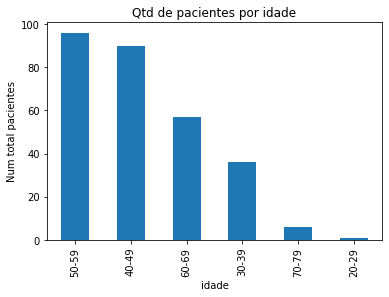

In [32]:
df['age'].value_counts().plot.bar()
plt.xlabel('idade') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd de pacientes por idade')
plt.show()

### Normalização dos dados - Padronização e escalamentos

In [33]:
#dropa a classe pra que ele possa prever ela
features = np.array(dfNumerico.drop('Class', axis = 1))
label = np.array(dfNumerico['Class'])

#Normalizar os resultados
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

## Balanceamento dos dados

In [34]:
#quantidade de dados na classe ==> Balanceamento?
len(df[df['Class']== 0]), len(df[df['Class'] == 1])

(201, 85)

In [35]:
#Porcentagem das classes
df['Class'].value_counts() / len(df)

0    0.702797
1    0.297203
Name: Class, dtype: float64

In [36]:
dfNumerico

,Class,node-caps,deg-malig,irradiat,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,0.0,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0.0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0.0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0.0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0.0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,0.0,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
282,1,0.0,3,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
283,1,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
284,1,0.0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


##Dados Faltantes

In [37]:
#Tratar valores faltantes
dfNumerico.fillna(dfNumerico.median(),inplace=True)

##Divisão base de treinamento e teste

Método Hold-out

In [38]:
X = np.array(dfNumerico.drop('Class', axis = 1))
y = np.array(dfNumerico['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [39]:
# Frequencia de cada classe nos dados de teste 
pd.Series(y_test).value_counts() / len(y_test)

0    0.697674
1    0.302326
dtype: float64

Validação cruzada

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
#scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='accuracy')

Método LOOCV

In [42]:
from sklearn.model_selection import LeaveOneOut

### Checagem

In [43]:
dfNumerico.isnull().mean()

Class                    0.0
node-caps                0.0
deg-malig                0.0
irradiat                 0.0
age_30-39                0.0
age_40-49                0.0
age_50-59                0.0
age_60-69                0.0
age_70-79                0.0
menopause_lt40           0.0
menopause_premeno        0.0
tumor-size_10-14         0.0
tumor-size_15-19         0.0
tumor-size_20-24         0.0
tumor-size_25-29         0.0
tumor-size_30-34         0.0
tumor-size_35-39         0.0
tumor-size_40-44         0.0
tumor-size_45-49         0.0
tumor-size_5-9           0.0
tumor-size_50-54         0.0
inv-nodes_12-14          0.0
inv-nodes_15-17          0.0
inv-nodes_24-26          0.0
inv-nodes_3-5            0.0
inv-nodes_6-8            0.0
inv-nodes_9-11           0.0
breast_right             0.0
breast-quad_left_low     0.0
breast-quad_left_up      0.0
breast-quad_right_low    0.0
breast-quad_right_up     0.0
dtype: float64

## Balanceamento

In [44]:
#Oversampling 
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
# SMOTE
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
samplers = {'RO': RandomOverSampler(),
            'SMOTE': SMOTE()}

In [46]:
for nome, tecnica in samplers.items():
  # aplicar a tecnica apenas nos dados de TREINO
  X_sampled, y_sampled = tecnica.fit_resample(X_train, y_train)
 
  # treino o modelo
  lr = LogisticRegression()
  lr.fit(X_sampled, y_sampled)

  # testo modelo
  y_pred = lr.predict(X_test)

  # reportar as metricas de avaliacao
  acc = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print(f'--- {nome} ---')
  print(f'Tx de acerto = {100.0 * acc}')
  print(f'Relatorio = \n {report}')

--- RO ---
Tx de acerto = 59.30232558139535
Relatorio = 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        60
           1       0.36      0.46      0.41        26

    accuracy                           0.59        86
   macro avg       0.55      0.56      0.55        86
weighted avg       0.62      0.59      0.60        86

--- SMOTE ---
Tx de acerto = 56.97674418604651
Relatorio = 
               precision    recall  f1-score   support

           0       0.73      0.60      0.66        60
           1       0.35      0.50      0.41        26

    accuracy                           0.57        86
   macro avg       0.54      0.55      0.54        86
weighted avg       0.62      0.57      0.59        86



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[36, 24],
       [13, 13]])

## Visualização de Dados

In [ ]:
#Class        286 non-null    object
 #1   age          286 non-null    object
 #2   menopause    286 non-null    object
 #3   tumor-size   286 non-null    object
 #4   inv-nodes    286 non-null    object
 #5   node-caps    286 non-null    object
 #6   deg-malig    286 non-null    int64 
 #7   breast       286 non-null    object
 #8   breast-quad  286 non-null    object
 #9   irradiat 

In [50]:
# A diferença do primeiro describe para esse foram as transformações feitas com o replace, porém a única classe com valores representativos inteiros 
# é a 'deg-malig', as demais são binárias 
df.describe()

,Class,node-caps,deg-malig,irradiat
count,286.000000,278.000000,286.000000,286.000000
mean,0.297203,0.201439,2.048951,0.237762
std,0.457828,0.401798,0.738217,0.426459
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,3.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000


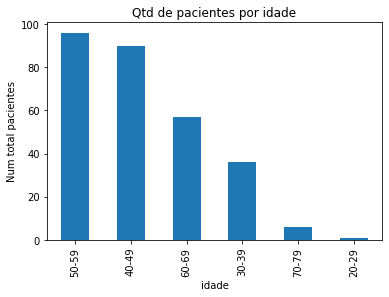

In [48]:
df['age'].value_counts().plot.bar()
plt.xlabel('idade') #legenda eixo x
plt.ylabel('Num total pacientes') #legenda eixo y
plt.title('Qtd de pacientes por idade')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


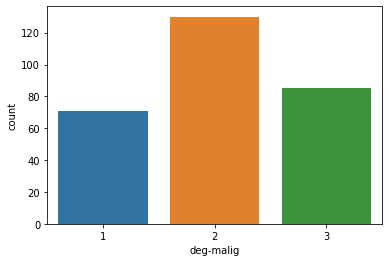

In [49]:
sns.countplot(df['deg-malig'])
plt.show()

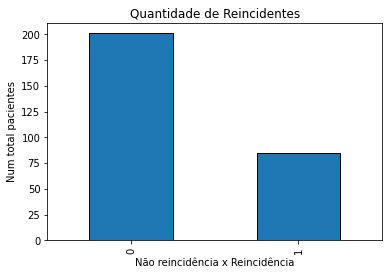

In [52]:
# Contagem de reincidência (Nossa classe)
df['Class'].value_counts().plot.bar(edgecolor="black")
plt.xlabel('Não reincidência x Reincidência')
plt.ylabel('Num total pacientes')
plt.title('Quantidade de Reincidentes')
plt.show()

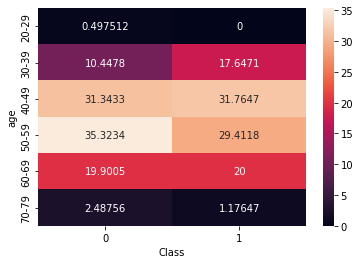

In [54]:
ctab = 100 * pd.crosstab(df['age'], df['Class'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

É possível observar que acontece a maior porcentagem de recorrência na faixa entre 40-49 anos, enquanto a menor ocorre entre os pacientes mais velhos (70-79, lembrando que essa faixa etária tem uma distribuição menor de dados)

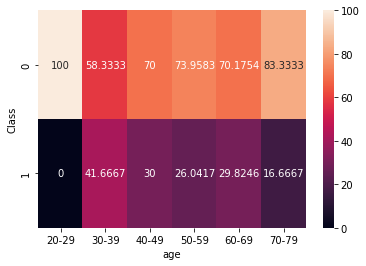

In [55]:
ctab = 100 * pd.crosstab(df['Class'], df['age'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

Comparando a porcentagem em cada uma das faixas etárias separadamente observa-se que a faixa 30-39 anos apresenta o resultado com maior recorrência da presença do câncer. Isso também pode estar relacionado com a conduta de tratamento tomada em cada faixa etária ser diferente. Mulheres com mais de 3 filhos e em fase de menopausa que apresentar tumores mamários é recomendada a retirada total das mamas, diminuindo a chance de reincidência do câncer pela retirada do tecido.

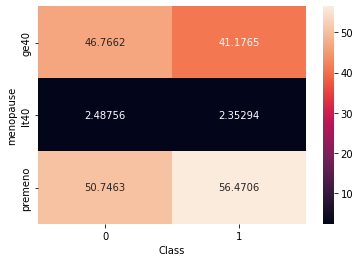

In [60]:
ctab = 100 * pd.crosstab(df['menopause'], df['Class'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

Aparentemente há uma similaridade de comportamento entre os grupos com e sem recorrência quando se trata de mulheres estando ou não na menopausa. O que parece influenciar mais é a idade em si, e não a menopausa.

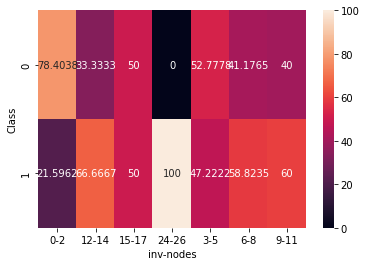

In [57]:
ctab = 100 * pd.crosstab(df['Class'], df['inv-nodes'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

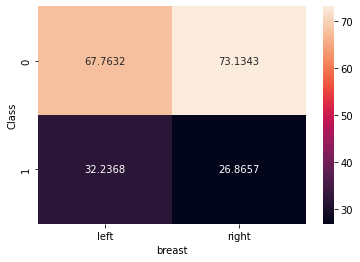

In [58]:
ctab = 100 * pd.crosstab(df['Class'], df['breast'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='g')
plt.show()

SyntaxError: ignored